In [148]:
#Alexandria Benedict, Assignment 1


import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import pandas as pd
import math

In [149]:
# Question 1
df1 = pd.read_csv('CONcreTEXT_trial_EN.tsv', sep='\t', header=None, engine= 'python')
df2 = pd.read_csv('CONcreTEXT_trial_IT.tsv', sep='\t', header=None, engine= 'python')
df1.head()

,0,1,2,3,4
0,TARGET,POS,INDEX,TEXT,MEAN
1,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
2,achievement,N,9,"Please list people you have helped , your pers...",3.03
3,activate,V,1,Add activated carbon straight to your vodka .,3.83
4,activate,V,15,"Place sensors around your garden , and when a ...",5.51


In [150]:
# Question 2

# ENG
list1 = []
for s in df1[3][1:]:
    words = nltk.word_tokenize(s)
    list1 += [word.lower() for word in words if word.isalpha()]
    
# IT
list2 = []
for s in df2[3][1:]:
    words = nltk.word_tokenize(s)
    list2 += [word.lower() for word in words if word.isalpha()]


In [151]:
# Question 3

# ENG
count1 = len(list1)

# IT
count2 = len(list2)
    
print("English: %s\nItalian: %s" % (count1, count2))

English: 1294
Italian: 1303


In [152]:
# Question 4

# ENG
estr = ''
for s in list1:
    estr += s + ' '
    
fdist1 = FreqDist()
for word in nltk.word_tokenize(estr):
    fdist1[word] += 1
    
print("English Unique Words: " , len(fdist1))
#fdist1.most_common(50)

# IT
istr = ''
for s in list2:
    istr += s + ' '
    
fdist2 = FreqDist()
for word in nltk.word_tokenize(istr):
    fdist2[word] += 1
    
print("Italian Unique Words: ", len(fdist2))
#fdist2.most_common(50)

English Unique Words:  638
Italian Unique Words:  708


In [153]:
# Question 5

eng = []
dist1 = fdist1.most_common(25)

#Get most common starting with M's
temp = fdist1.most_common()
mlist = []
mcounter = 0
for s in temp:
    if mcounter == 25: break
    if s[0][:1] == "m":
        mcounter += 1
        mlist.append(s)


# 25 most common
rank = 1;
for i in dist1:
    eng.append([i, rank, fdist1.freq(i[0]), rank*fdist1.freq(i[0])])
    rank += 1
    
# 25 most common with M's
mrank = 1;
for i in mlist:
    eng.append([i, mrank, fdist1.freq(i[0]), mrank*fdist1.freq(i[0])])
    mrank += 1
    


# Italian
it = []
dist2 = fdist2.most_common(25)

#Get most common starting with M's
temp2 = fdist2.most_common()
mlist2 = []
mcounter2 = 0
for s in temp2:
    if mcounter2 == 25: break
    if s[0][:1] == "m":
        mcounter2 += 1
        mlist2.append(s)


# 25 most common
rank2 = 1;
for i in dist2:
    it.append([i, rank2, fdist2.freq(i[0]), rank2*fdist2.freq(i[0])])
    rank2 += 1
    
# 25 most common with M's
mrank2 = 1;
for i in mlist2:
    it.append([i, mrank2, fdist2.freq(i[0]), mrank2*fdist2.freq(i[0])])
    mrank2 += 1

print("English: ", eng)
print("___________________________________________________")
print("Italian: " , it)

English:  [[('the', 63), 1, 0.04868624420401855, 0.04868624420401855], [('you', 45), 2, 0.0347758887171561, 0.0695517774343122], [('a', 39), 3, 0.030139103554868624, 0.09041731066460587], [('to', 36), 4, 0.027820710973724884, 0.11128284389489954], [('your', 35), 5, 0.02704791344667697, 0.13523956723338484], [('and', 33), 6, 0.025502318392581144, 0.15301391035548687], [('of', 29), 7, 0.02241112828438949, 0.15687789799072643], [('in', 20), 8, 0.015455950540958269, 0.12364760432766615], [('or', 19), 9, 0.014683153013910355, 0.1321483771251932], [('can', 14), 10, 0.010819165378670788, 0.10819165378670788], [('for', 13), 11, 0.010046367851622875, 0.11051004636785162], [('are', 13), 12, 0.010046367851622875, 0.1205564142194745], [('if', 12), 13, 0.00927357032457496, 0.1205564142194745], [('is', 11), 14, 0.008500772797527048, 0.11901081916537867], [('with', 10), 15, 0.0077279752704791345, 0.11591962905718702], [('that', 9), 16, 0.006955177743431221, 0.11128284389489954], [('will', 9), 17, 0.0

#### Question 6

When looking at the frequencies of the words, they do not follow the pattern of Zipf's Law. According to Zipf's Law, the most frequent word would have a frequency f, second frequent word would be approximately f/2, third most frequent as f/3, and so on. In the English text, the frequency of the first ranked word is .048, second is .034, third .031, and so forth. This does not follow the distribution pattern of Zipf's Law. I think that this happens perhaps because the text being used is not one large body of text or corpus, but rather separate sentences which do not correspond with each other. Although the most frequent word(s) are as expected (words like the, a, you, etc.), other words which portray concepts would not correlate as much as they would in a complete flowing body of text. This would be the same for the Italian text.

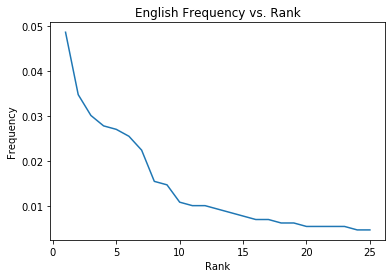

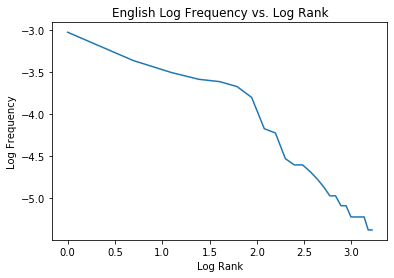

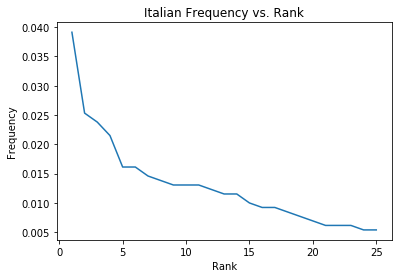

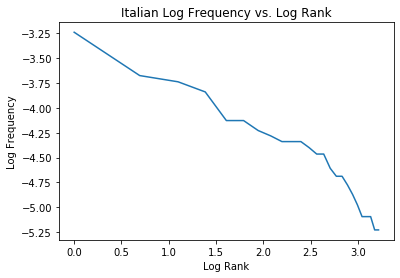

In [154]:
# Question 7

engFreq = []
engRank = []
leFreq = []
leRank = []

count = 0
for i in eng:
    if count == 25: break
    engRank.append(i[1])
    engFreq.append(i[2])
    leRank.append(math.log(i[1]))
    leFreq.append(math.log(i[2]))
    count += 1
    

plt.plot(engRank, engFreq)
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.title("English Frequency vs. Rank")
plt.show()
plt.plot(leRank, leFreq)
plt.ylabel("Log Frequency")
plt.xlabel("Log Rank")
plt.title("English Log Frequency vs. Log Rank")
plt.show()

itFreq = []
itRank = []
liFreq = []
liRank = []

count2 = 0
for i in it:
    if count2 == 25: break
    itRank.append(i[1])
    itFreq.append(i[2])
    liRank.append(math.log(i[1]))
    liFreq.append(math.log(i[2]))
    count2 += 1
    

plt.plot(itRank, itFreq)
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.title("Italian Frequency vs. Rank")
plt.show()
plt.plot(liRank, liFreq)
plt.ylabel("Log Frequency")
plt.xlabel("Log Rank")
plt.title("Italian Log Frequency vs. Log Rank")
plt.show()